# Video Game Sales

## Goal

You work for a data science consulting company. A major video game production company, has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below) and, as a first project, would like to know:

1. What are some major differences between the North American, European, and Japanese video game markets?

2. What video game genres are trending in each market? 

3. What features about a video game are most indicative of its success?


## The Data
This dataset contains a list of video games with sales greater than 100,000 copies.
* `Rank` - Ranking of overall sales
* `Name` - The games name
* `Platform` - Platform of the games release (i.e. PC,PS4, etc.)
* `Year` - Year of the game's release
* `Genre` - Genre of the game
* `Publisher` - Publisher of the game
* `NA_Sales` - Sales in North America (in millions)
* `EU_Sales` - Sales in Europe (in millions)
* `JP_Sales` - Sales in Japan (in millions)
* `Other_Sales` - Sales in the rest of the world (in millions)
* `Global_Sales` - Total worldwide sales.

In [17]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
#import plotly.plotly as py
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dat = pd.read_csv('vgsales.csv')
dat.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
dat.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
dat.describe(include='O')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [6]:
dat['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [7]:
dat['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Notes: 
* `Year` and `Publisher` have missing values. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1147921d0>,
      dtype=object)

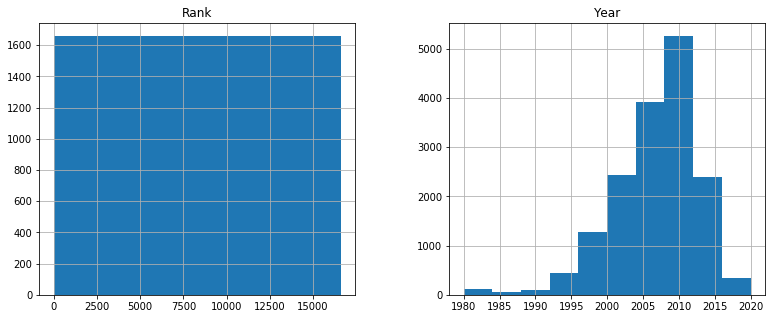

In [9]:
dat[['Rank', 'Year']].hist(figsize=(13,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120b79748>,
      dtype=object)

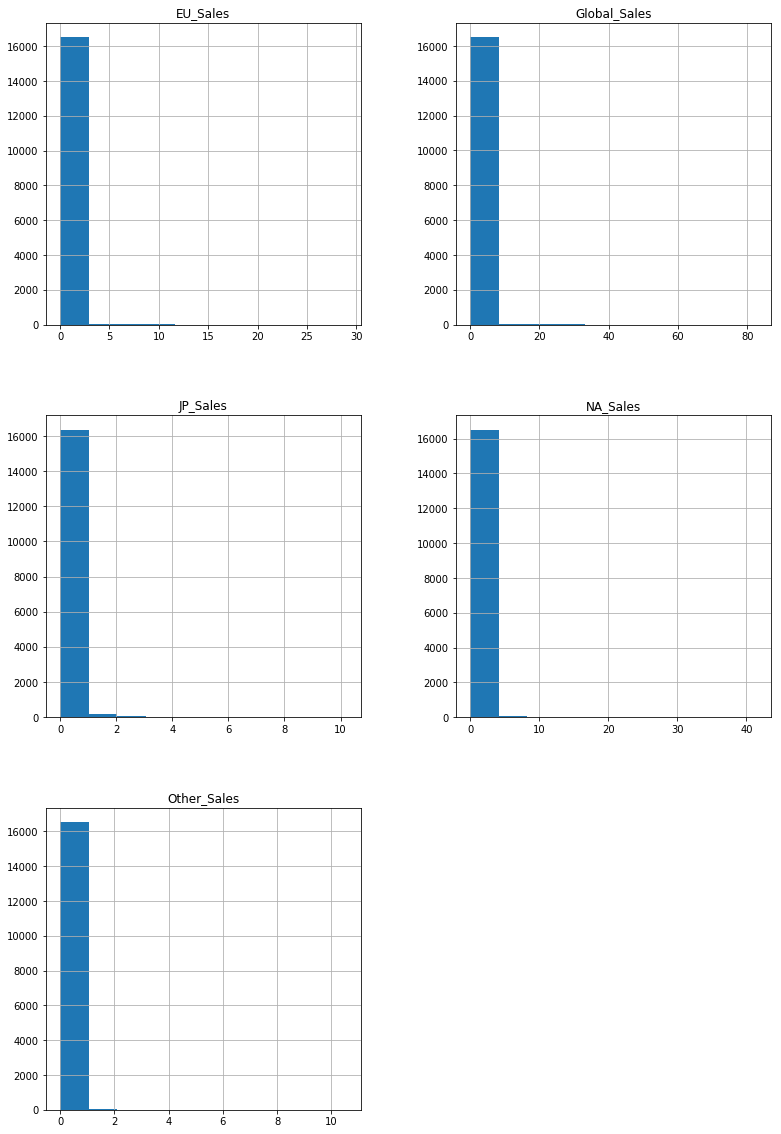

In [14]:
dat[['NA_Sales', 'EU_Sales', 'JP_Sales', 
     'Other_Sales', 'Global_Sales']].hist(figsize=(13,20))

In [27]:
def plot_kde_distribution( df , var , target ,
                          **kwargs ):
    '''
    This is a very general plotting function that makes kde distribution
        plots for each level of target.
    var = x-axis distribution variable
    target = categorical levels to plot seperate (overlayed) distributions
        for
    '''
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , 
                          hue=target , 
                          aspect=2 , # aspect ratio of plot
                          row = row , 
                          col = col )
    facet.map( sns.kdeplot , var , shade= True ) 
        # kdeplot = kernel density estimate
    facet.set(xlim = (df[var].min(), df[var].max()))
    facet.add_legend()

NameError: name 'df' is not defined

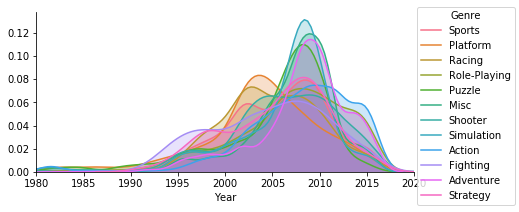

In [25]:
# Temporal trends by Genre:
plot_kde_distribution(dat, var='Year', target='Genre')

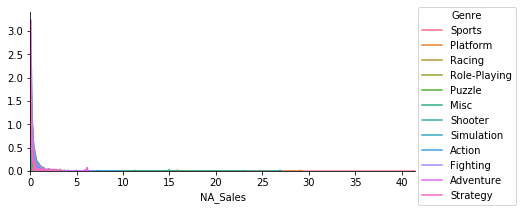

In [26]:
plot_kde_distribution(dat, var='NA_Sales', target='Genre')